In [21]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [22]:
train = pd.read_csv('digitRecognizer/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [23]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.2, random_state=42)

print( "\nTraining Percentages:\n" )
print(train_X.shape[0]/len(train.iloc[:,1:]))
print(train_Y.shape[0]/len(train.iloc[:,1:]))
print( train_X.shape )


Training Percentages:

0.8
0.8
(33600, 784)


In [24]:
# No shaping
myNumber = train_X.iloc[5]
myNumberLabel = train_Y.iloc[5]
myNumber2 = train_X.iloc[7]
myNumberLabel2 = train_Y.iloc[7]
print (myNumber)
print (myNumberLabel)

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 28009, Length: 784, dtype: int64
8


In [25]:
## Shape it into the 28x28 image.
myNumber = myNumber.values.reshape((28,28))
myNumber2 = myNumber2.values.reshape((28,28))
print(myNumber.shape)
for x in myNumber: print (' '.join('%s'%n for n in x))

(28, 28)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 86 170 170 198 170 170 114 57 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 114 255 255 255 255 255 255 255 255 226 29 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 86 255 255 57 29 0 114 198 255 255 255 255 86 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 226 255 114 0 0 0 0 0 29 86 198 255 255 0 0 0 0 0 0 0
0 0 0 0 0 0 0 86 255 114 0 0 0 0 0 0 0 0 57 255 255 0 0 0 0 0 0 0
0 0 0 0 0 0 0 141 255 57 0 0 0 0 0 0 0 0 0 198 255 57 0 0 0 0 0 0
0 0 0 0 0 0 0 255 255 0 0 0 0 0 0 0 0 0 0 170 255 29 0 0 0 0 0 0
0 0 0 0 0 0 0 198 255 86 0 0 0 86 170 226 170 57 114 255 198 0 0 0 0 0 0 0
0 0 0 0 0 0 0 57 255 255 198 114 198 255 255 255 255 255 255 255 57 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 170 255 255 255 255 255 255 255 255 255 255 226 

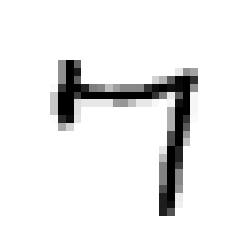

7


In [26]:
plt.imshow(myNumber2, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print (myNumberLabel2)

In [35]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(train_X,train_Y)

y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Test: ",sum(y_pred==test_Y)/len(test_Y))

myNumber = myNumber.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber))

Accuracy on Training:  0.9061904761904762
Accuracy on Test:  0.8454761904761905
Prediction on myNumber: 8


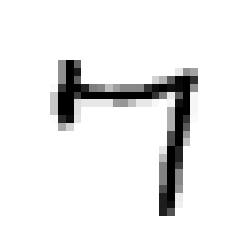

Prediction on myNumber: 7


In [36]:
plt.imshow(myNumber2.reshape((28,28)), cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber2 = myNumber2.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber2))